In [1]:
import pandas
import numpy

n = 10000
traffic = numpy.random.normal(size=(n,))
distance = numpy.random.normal(size=(n,))

service_problems = numpy.random.normal(size=(n,)) + traffic + 2 * distance
discount = numpy.random.normal(size=(n,)) + service_problems

new_items = numpy.random.normal(size=(n,))
stale_items = numpy.random.normal(size=(n,))

engagement = numpy.random.normal(size=(n,)) + new_items - stale_items
retention = (
    numpy.random.normal(size=(n,)) + discount - 2 * service_problems + engagement
)

data = pandas.DataFrame(
    {
        "traffic": traffic,
        "distance": distance,
        "service_problems": service_problems,
        "discount": discount,
        "new_items": new_items,
        "stale_items": stale_items,
        "engagement": engagement,
        "retention": retention,
    }
)

In [2]:
from causal_discovery_algs.icd import LearnStructICD
from causal_discovery_algs.fci import LearnStructFCI
from causal_discovery_utils.cond_indep_tests import CondIndepParCorr

par_corr_test = CondIndepParCorr(dataset=data, threshold=0.01)
icd = LearnStructFCI(set(data.columns), par_corr_test)  # instantiate an ICD learner
icd.learn_structure()  # learn the causal graph

Removing edge traffic -- engagement based on the conditioning set: (){'action': 'remove_edge', 'node_i': 'traffic', 'node_j': 'engagement', 'cond_set': []}
Removing edge traffic -- distance based on the conditioning set: (){'action': 'remove_edge', 'node_i': 'traffic', 'node_j': 'distance', 'cond_set': []}
Removing edge traffic -- stale_items based on the conditioning set: (){'action': 'remove_edge', 'node_i': 'traffic', 'node_j': 'stale_items', 'cond_set': []}
Removing edge traffic -- new_items based on the conditioning set: (){'action': 'remove_edge', 'node_i': 'traffic', 'node_j': 'new_items', 'cond_set': []}
Removing edge service_problems -- engagement based on the conditioning set: (){'action': 'remove_edge', 'node_i': 'service_problems', 'node_j': 'engagement', 'cond_set': []}
Removing edge service_problems -- stale_items based on the conditioning set: (){'action': 'remove_edge', 'node_i': 'service_problems', 'node_j': 'stale_items', 'cond_set': []}
Removing edge service_problems

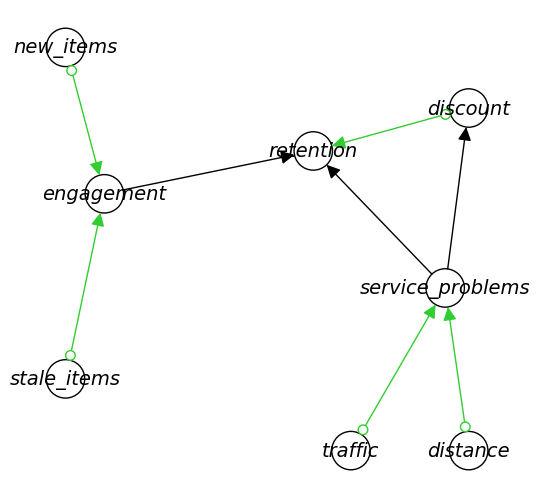

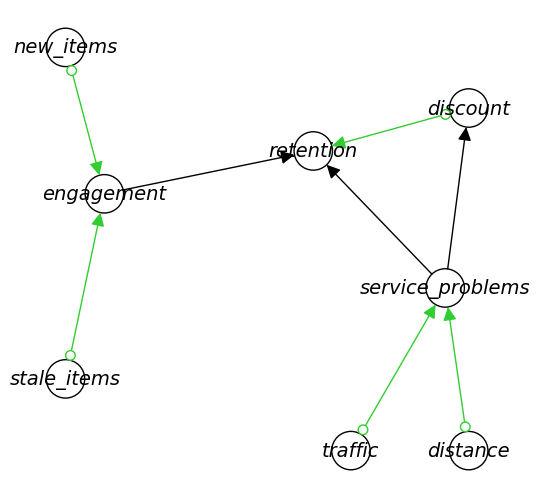

In [3]:
from plot_utils.draw_graph import draw_graph

draw_graph(icd.graph)

In [4]:
from server.utils import graph_object_to_edges

edges = [(x["source"], x["target"]) for x in graph_object_to_edges(icd.graph._graph)]

import networkx as nx

cg = {
    "edges": edges,
}

causal_graph = nx.DiGraph([tuple(x) for x in cg["edges"]])

In [20]:
import networkx as nx
from whykan.kanSCM import kanSCM
from whykan.definitions import SCMParams
from whykan.definitions import KANParams
import numpy
import pandas

In [26]:
cg = {
    "edges": edges,
}

causal_graph = nx.DiGraph([tuple(x) for x in cg["edges"]])


scm_params = SCMParams()
kan_params = KANParams()

kan_params.symbolic_functions = ["x"]
scm_params.default_noise_distributions = ["norm"]


scm = kanSCM(
    data, causal_graph, default_scm_params=scm_params, default_kan_params=kan_params
)

In [27]:
scm.train()

train loss: 3.80e-01 | test loss: 3.84e-01 | reg: 1.76e-01 : 100%|██| 20/20 [00:01<00:00, 14.38it/s]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm] [0.00 sec] [RSS: 0.0606929] [loc=-0.008 scale=0.384]
[distfit] >INFO> [norm] [0.00 sec] [RSS: 0.0606929] [loc=-0.008 scale=0.384]
[distfit] >INFO> Compute confidence intervals [parametric]


fixing (0,0,0) with x, r2=0.9998356103897095


train loss: 4.29e-01 | test loss: 4.29e-01 | reg: 3.59e+00 : 100%|██| 20/20 [00:02<00:00,  7.73it/s]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm] [0.00 sec] [RSS: 0.0893546] [loc=-0.001 scale=0.428]
[distfit] >INFO> [norm] [0.00 sec] [RSS: 0.0893546] [loc=-0.001 scale=0.428]
[distfit] >INFO> Compute confidence intervals [parametric]


fixing (0,0,0) with x, r2=0.9998651146888733
fixing (0,1,0) with x, r2=0.9998115301132202
fixing (0,2,0) with x, r2=0.9995162487030029


train loss: 4.14e-01 | test loss: 4.11e-01 | reg: 2.20e+00 : 100%|██| 20/20 [00:01<00:00, 11.45it/s]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm] [0.00 sec] [RSS: 0.0366954] [loc=0.002 scale=0.411]
[distfit] >INFO> [norm] [0.00 sec] [RSS: 0.0366954] [loc=0.002 scale=0.411]
[distfit] >INFO> Compute confidence intervals [parametric]


fixing (0,0,0) with x, r2=0.9999001622200012


[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm] [0.00 sec] [RSS: 0.00603621] [loc=-0.000 scale=1.000]
[distfit] >INFO> [norm] [0.00 sec] [RSS: 0.00603621] [loc=-0.000 scale=1.000]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm] [0.00 sec] [RSS: 0.00425011] [loc=0.000 scale=1.000]
[distfit] >INFO> [norm] [0.00 sec] [RSS: 0.00425011] [loc=0.000 scale=1.000]
[distfit] >INFO> Compute confidence intervals [parametric]


fixing (0,1,0) with x, r2=0.9991036057472229


train loss: 5.76e-01 | test loss: 5.77e-01 | reg: 1.91e+00 : 100%|██| 20/20 [00:01<00:00, 11.84it/s]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm] [0.00 sec] [RSS: 0.012253] [loc=-0.001 scale=0.577]
[distfit] >INFO> [norm] [0.00 sec] [RSS: 0.012253] [loc=-0.001 scale=0.577]
[distfit] >INFO> Compute confidence intervals [parametric]


fixing (0,0,0) with x, r2=0.9995519518852234


[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm] [0.00 sec] [RSS: 0.00466805] [loc=-0.000 scale=1.000]
[distfit] >INFO> [norm] [0.00 sec] [RSS: 0.00466805] [loc=-0.000 scale=1.000]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm] [0.00 sec] [RSS: 0.00660329] [loc=0.000 scale=1.000]
[distfit] >INFO> [norm] [0.00 sec] [RSS: 0.00660329] [loc=0.000 scale=1.000]
[distfit] >INFO> Compute confidence intervals [parametric]


fixing (0,1,0) with x, r2=0.9997587203979492


In [46]:
scm.formulas

{'discount': 1.003983632*service_problems + 0.0109749151,
 'retention': 0.9909292201*discount + 1.0162898849*engagement - 0.7390249426*service_problems + 0.0093646179,
 'service_problems': 1.9938052425*distance + 0.9853534634*traffic - 0.0118181119,
 'engagement': 0.9945073426*new_items - 1.0046127325*stale_items + 0.0194086976}

In [3]:
import kan

In [2]:
import pykan

ModuleNotFoundError: No module named 'pykan'

In [9]:
from causal_discovery_algs.icd import LearnStructICD
from causal_discovery_algs.fci import LearnStructFCI
from causal_discovery_utils.cond_indep_tests import CondIndepParCorr

par_corr_test = CondIndepParCorr(dataset=data, threshold=0.02)
icd = LearnStructFCI(set(data.columns), par_corr_test)  # instantiate an ICD learner
icd.learn_structure()  # learn the causal graph

Removing edge new_items -- stale_items based on the conditioning set: (){'action': 'remove_edge', 'node_i': 'new_items', 'node_j': 'stale_items', 'cond_set': []}
Removing edge new_items -- service_problems based on the conditioning set: (){'action': 'remove_edge', 'node_i': 'new_items', 'node_j': 'service_problems', 'cond_set': []}
Removing edge new_items -- traffic based on the conditioning set: (){'action': 'remove_edge', 'node_i': 'new_items', 'node_j': 'traffic', 'cond_set': []}
Removing edge new_items -- discount based on the conditioning set: (){'action': 'remove_edge', 'node_i': 'new_items', 'node_j': 'discount', 'cond_set': []}
Removing edge new_items -- distance based on the conditioning set: (){'action': 'remove_edge', 'node_i': 'new_items', 'node_j': 'distance', 'cond_set': []}
Removing edge stale_items -- service_problems based on the conditioning set: (){'action': 'remove_edge', 'node_i': 'stale_items', 'node_j': 'service_problems', 'cond_set': []}
Removing edge stale_item

In [11]:
data.to_csv("customer_service_data.csv", index=False)

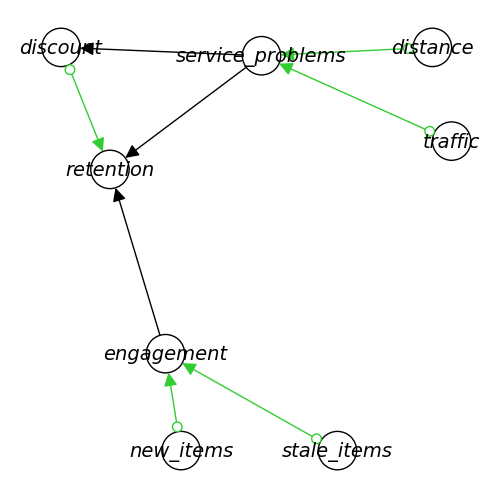

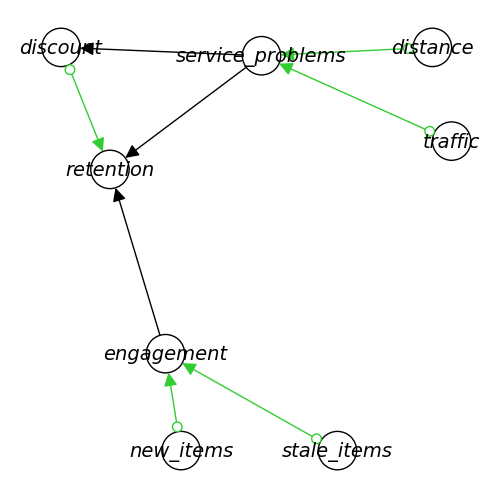

In [10]:
from plot_utils.draw_graph import draw_graph

draw_graph(icd.graph)

In [118]:
par_corr_test.correlation_matrix[1, 2]

0.3995616888162958

In [119]:
par_corr_test.columns

['C1', 'T1', 'T2', 'T3']

In [133]:
mat, mapping = icd.graph.get_adj_mat_with_cols()
mat, mapping

(array([[0, 2, 0, 3],
        [2, 0, 0, 2],
        [0, 0, 0, 2],
        [2, 2, 1, 0]]),
 {0: 'C1', 1: 'T1', 2: 'T2', 3: 'T3'})

In [134]:
list(icd.graph.nodes_set)

['T1', 'T3', 'T2', 'C1']

In [135]:
def adjacency_matrix_to_edges(adj_mat, mapping):
    edges = []
    n = adj_mat.shape[0]

    relationship_map = {1: "partially_known", 2: "arrow", 3: "directed"}

    for i in range(n):
        for j in range(i + 1, n):
            if adj_mat[i, j] != 0:
                relationship_forward = adj_mat[i, j]
                relationship_backward = adj_mat[j, i]

                if relationship_forward == relationship_backward:
                    edges.append(
                        {
                            "from": mapping[i],
                            "to": mapping[j],
                            "edge_type": "undirected",
                            "relationship": relationship_forward,
                        }
                    )
                else:
                    if relationship_forward == 2:
                        edge_type = relationship_map[relationship_backward]
                        edges.append(
                            {
                                "from": mapping[i],
                                "to": mapping[j],
                                "edge_type": edge_type,
                                "relationship": relationship_backward,
                            }
                        )
                    else:
                        edge_type = relationship_map[relationship_forward]
                        edges.append(
                            {
                                "from": mapping[j],
                                "to": mapping[i],
                                "edge_type": edge_type,
                                "relationship": relationship_forward,
                            }
                        )

    return edges

In [136]:
edges = adjacency_matrix_to_edges(mat, mapping)
for edge in edges:
    print(edge)

{'from': 'C1', 'to': 'T1', 'edge_type': 'undirected', 'relationship': 2}
{'from': 'T3', 'to': 'C1', 'edge_type': 'directed', 'relationship': 3}
{'from': 'T1', 'to': 'T3', 'edge_type': 'undirected', 'relationship': 2}
{'from': 'T2', 'to': 'T3', 'edge_type': 'partially_known', 'relationship': 1}


In [93]:
from_nodes = [1, 2]

In [91]:
for origin in icd.graph._graph:
    for destination in icd.graph._graph[origin]:
        print(origin, destination, icd.graph._graph[origin][destination])

T3 o-- set()
T3 --- set()
T3 <-- {'T2', 'T1'}
C2 o-- {'T1', 'T2'}
C2 --- set()
C2 <-- set()
T1 o-- set()
T1 --- {'T3'}
T1 <-- {'C2', 'C1'}
T2 o-- set()
T2 --- {'T3'}
T2 <-- {'C2', 'C1'}
C1 o-- {'T1', 'T2'}
C1 --- set()
C1 <-- set()


In [92]:
icd.graph._graph[origin]

{'o--': {'T1', 'T2'}, '---': set(), '<--': set()}